<a href="https://colab.research.google.com/github/uzairafnan007/ADS/blob/main/DAS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759)

# data (as pandas dataframes)
X = glioma_grading_clinical_and_mutation_features.data.features
y = glioma_grading_clinical_and_mutation_features.data.targets

# metadata
print(glioma_grading_clinical_and_mutation_features.metadata)

# variable information
print(glioma_grading_clinical_and_mutation_features.variables)


{'uci_id': 759, 'name': 'Glioma Grading Clinical and Mutation Features', 'repository_url': 'https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/759/data.csv', 'abstract': 'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading 

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
df = pd.read_csv("mtcars.csv")
print(df.head())
df.describe()


               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


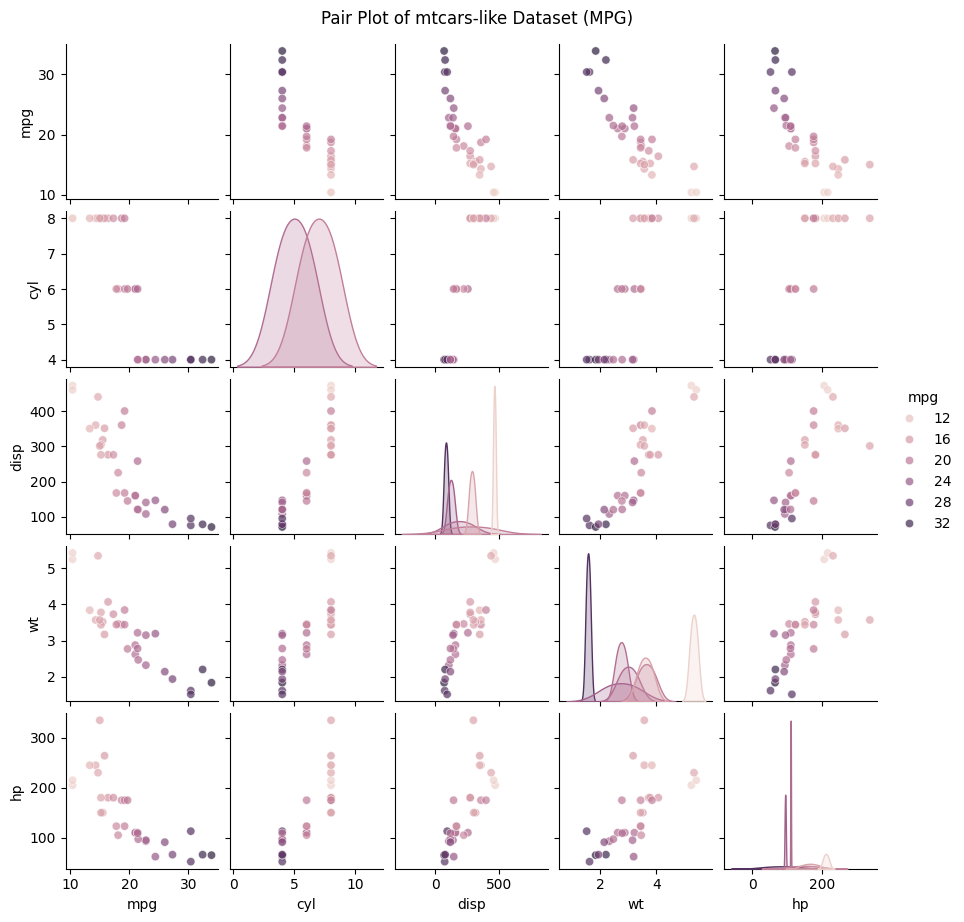

In [ ]:
sns.pairplot(df,
             vars=['mpg', 'cyl', 'disp', 'wt', 'hp'],
             hue='mpg',
             plot_kws={'alpha': 0.7},
             height=1.8)

plt.suptitle('Pair Plot of mtcars-like Dataset (MPG)', y=1.02)
plt.show()

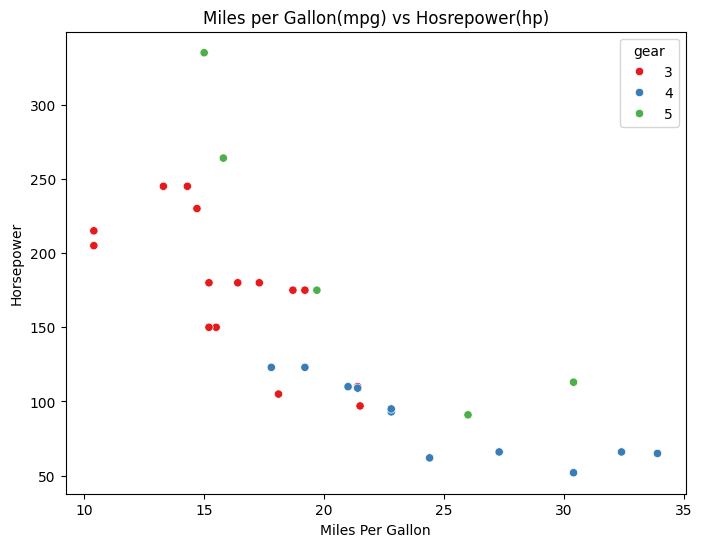

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="mpg", y="hp", hue="gear", data=df, palette="Set1")
plt.title("Miles per Gallon(mpg) vs Hosrepower(hp)")
plt.xlabel("Miles Per Gallon")
plt.ylabel("Horsepower")
plt.show()


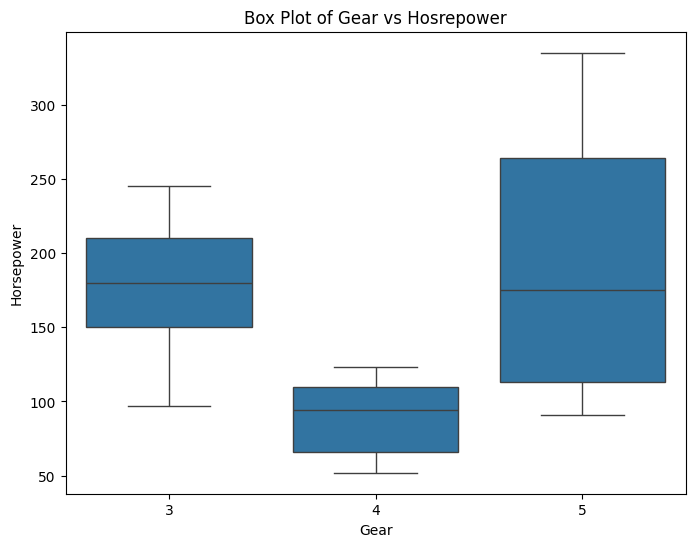

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="gear", y="hp", data=df)
plt.title("Box Plot of Gear vs Hosrepower")
plt.xlabel("Gear")
plt.ylabel("Horsepower")
plt.show()


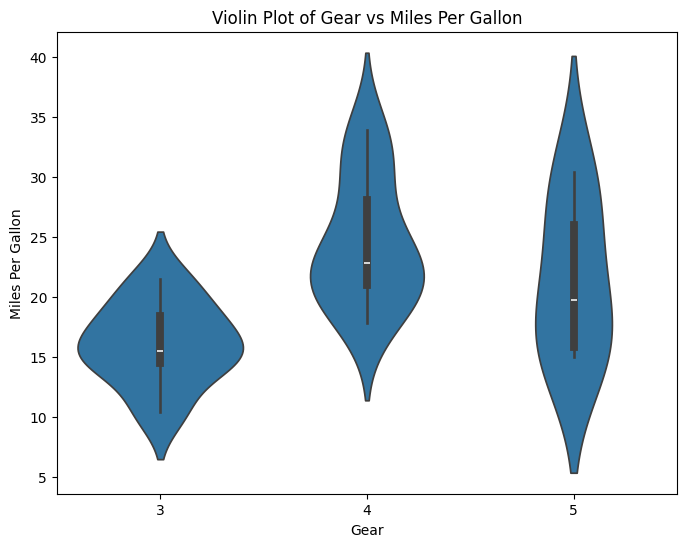

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="gear", y="mpg", data=df)
plt.title("Violin Plot of Gear vs Miles Per Gallon")
plt.xlabel("Gear")
plt.ylabel("Miles Per Gallon")
plt.show()


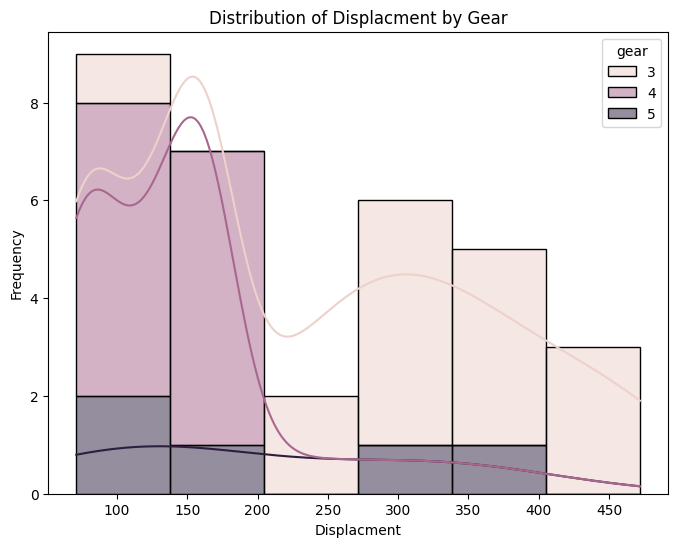

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="disp", hue="gear", kde=True, multiple="stack")
plt.title("Distribution of Displacment by Gear")
plt.xlabel("Displacment")
plt.ylabel("Frequency")
plt.show()


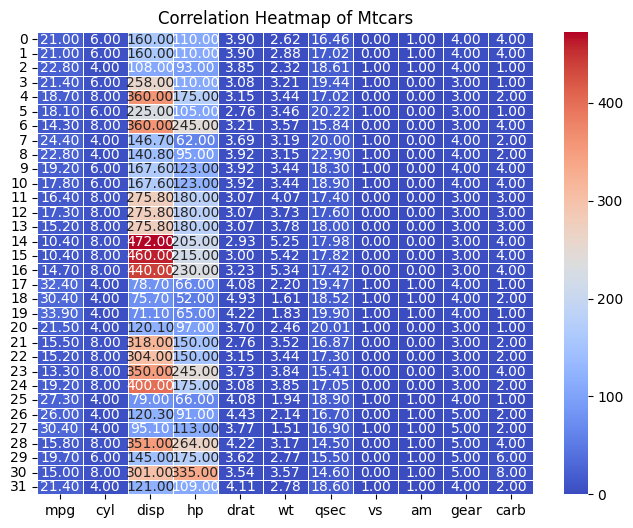

In [ ]:
plt.figure(figsize=(8, 6))
corr = df.drop(columns=['model'])
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Mtcars")
plt.show()


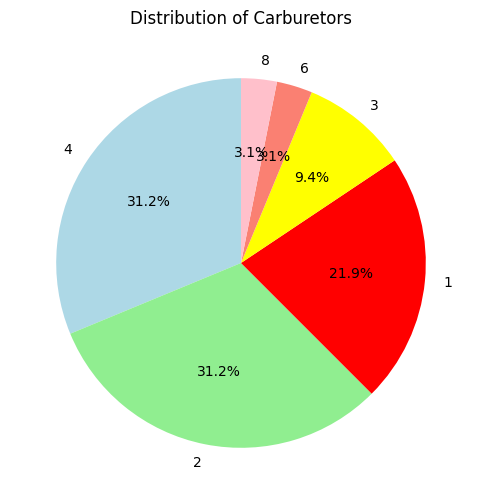

In [ ]:
mt_count = df['carb'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(mt_count, labels=mt_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'red','yellow','salmon','pink'])
plt.title("Distribution of Carburetors")
plt.show()


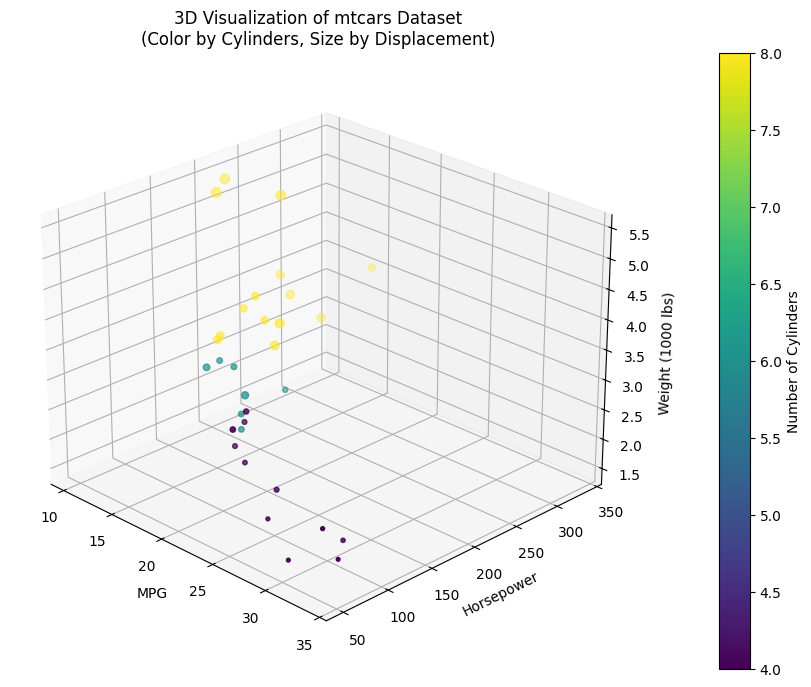

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

mtcars=df.copy()
# Plot points
scatter = ax.scatter(mtcars['mpg'],
                    mtcars['hp'],
                    mtcars['wt'],
                    c=mtcars['cyl'],
                    cmap='viridis',
                    s=mtcars['disp']/10)  # Size by engine displacement

# Labels and title
ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Weight (1000 lbs)')
plt.title('3D Visualization of mtcars Dataset\n(Color by Cylinders, Size by Displacement)')

# Add colorbar
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('Number of Cylinders')

# Adjust viewing angle
ax.view_init(elev=25, azim=-45)

plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Load mtcars dataset
url = "https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv"
mtcars = pd.read_csv(url)

# Create interactive 3D scatter plot
fig = px.scatter_3d(mtcars,
                    x='mpg',        # Miles/(US) gallon
                    y='hp',         # Gross horsepower
                    z='wt',         # Weight (1000 lbs)
                    color='cyl',    # Number of cylinders
                    symbol='cyl',   # Different symbols per cylinder count
                    hover_name='model',  # Show car model on hover
                    title='3D Visualization of mtcars Dataset',
                    labels={'mpg': 'MPG', 'hp': 'Horsepower', 'wt': 'Weight (1000 lbs)'},
                    height=800)

# Customize layout
fig.update_layout(scene=dict(
                    xaxis_title='MPG (Fuel Efficiency)',
                    yaxis_title='Horsepower',
                    zaxis_title='Weight'),
                  margin=dict(l=0, r=0, b=0, t=40))

# Show plot
pio.show(fig)